### AE4465 (MM&A) - Lecture5 (Monotonicity)

In prognostics and health management (PHM), it is imperative to have quality data. In PHM we have three popular methods to do monotonicity, trendability and prognosability calculation.
Monotonicity is calculated as:

$$ mon = \frac{1}{M} \sum_{j=1}^{M} \Bigg| \sum_{k=1}^{N_j-1} \mbox{sign}\Big(\frac{x(k+1) - x(k)}{N_j - 1}\Big) \Bigg|$$

Where:
$j$ is the jth system,
$M$ is the number of systems (or units),
$N_j$ is the number of measurements for system j

In this tutorial we will explore C-MAPSS case study and how to calculate the monotonicity of different signals changing the window size.


In [29]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Data analysis

We can now open the CMAPSS dataset001 to perform some operations on the data.


In [2]:
# Import the data in csv file
df = pd.read_csv('data/les05_CMAPSStrain001.txt', sep=' ')
# Read the columns
print('The columns of the csv file are: ')
df.head()

The columns of the csv file are: 


,Equipment,Cycle,Op1,Op2,Op3,1,2,3,4,5,...,12,13,14,15,16,17,18,19,20,21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


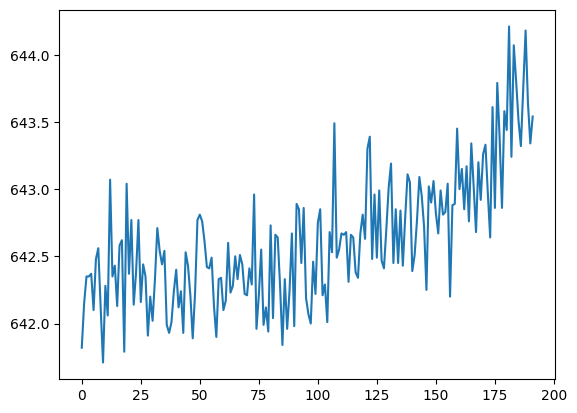

In [5]:
# Let's start by plotting our time series.
mask_equip1 = df['Equipment'] == 1 # Select column Equipment with value 1
plt.plot(df.loc[mask_equip1, '2']) # Select feature 2 of unit 1
plt.show()

In [31]:
# The sign or signum function is a standard mathematical function defined as sign(z) = z/|z|
def calculate_monotonicity(window_size, trajectory):
    diff_signals = []
    for i in range(len(trajectory) - window_size):
        diff = trajectory[i + window_size] - trajectory[i]
        if diff >= 0: diff_signals.append(1)
        else:
            diff_signals.append(-1)
    sum_sign = math.fabs(np.sum(diff_signals))

    return sum_sign/  (len(trajectory) - window_size)

### Function of monotonicity

After defining the function of monotonicity we can use it to calculate the monotonicity of different unit trajectories varying the window size.

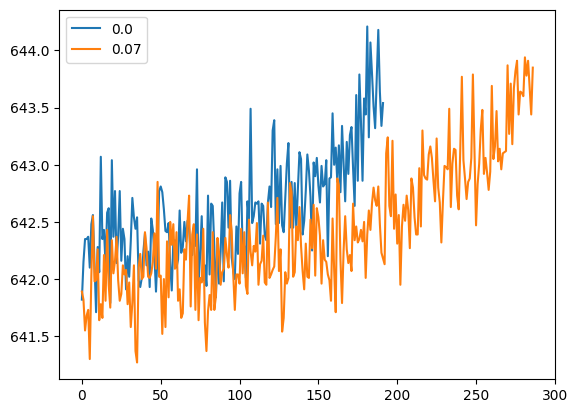

In [33]:

mask_equip1 = df['Equipment'] == 1 # Select column Equipment with value 1
trajectory_1 = df.loc[mask_equip1, '2'].values

mask_equip2 = df['Equipment'] == 2 # Select column Equipment with value 1
trajectory_2 = df.loc[mask_equip2, '2'].values

mon_1 = round(calculate_monotonicity(2, trajectory_2),2)
mon_2 = round(calculate_monotonicity(2, trajectory_1),2)

plt.plot(trajectory_1, label=str(mon_1))
plt.plot(trajectory_2, label=str(mon_2))
plt.legend()
plt.show()

### Trying with bigger window sizes

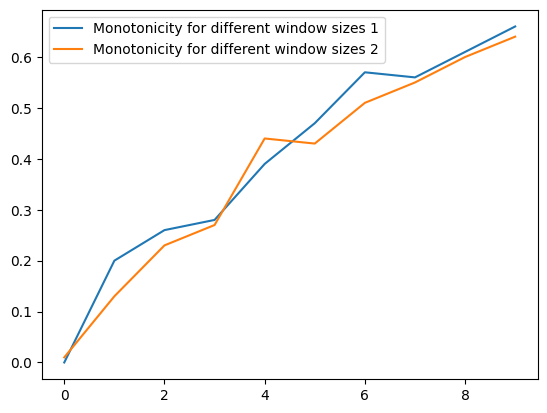

In [35]:
mons_1 = []
mons_2 = []

for w in range(1, 100, 10):
    mask_equip1 = df['Equipment'] == 1 # Select column Equipment with value 1
    trajectory_1 = df.loc[mask_equip1, '2'].values

    mask_equip2 = df['Equipment'] == 2 # Select column Equipment with value 1
    trajectory_2 = df.loc[mask_equip2, '2'].values

    mon_1 = round(calculate_monotonicity(window_size=w, trajectory=trajectory_2),2)
    mon_2 = round(calculate_monotonicity(window_size=w, trajectory=trajectory_1),2)

    mons_1.append(mon_1)
    mons_2.append(mon_2)

plt.plot(mons_1, label='Monotonicity for different window sizes 1')
plt.plot(mons_2, label='Monotonicity for different window sizes 2')
plt.legend()
plt.show()